<div style="text-align:center">

# M504D
##  AI and Applications
### *Individual Final Project*

<hr/>

<p style="text-align:center">
<strong>Student Name</strong>: Anh Tuan Ta<br/>
<strong>Student ID</strong>: GH1046139.<br/>
<strong>Student Email</strong>: anh.ta@gisma-student.com<br/>
<strong>LinkedIn</strong>:
<a href="https://www.linkedin.com/in/ta-anh-tuan-ai-engineer">https://www.linkedin.com/in/ta-anh-tuan-ai-engineer</a>
</p>

<p style="text-align:center">MSc of DATA SCIENCE, AI AND DIGITAL BUSINESS</p>

<hr/>

</div>


# SaaS Customer Churn Data Science Consulting

## Business Context - SaaS Customer Churn

**Role:** Data Science Consultant  
**Client:** A B2B SaaS company aiming to reduce churn and increase revenue retention.  
**Data:** `saas-customer-churn.csv` — customer profile, plan, product usage/engagement, support interactions, billing/revenue, tenure, and churn labels.  

**Why this analysis?**  
Churn erodes recurring revenue and increases acquisition costs. We’ll explore data quality, engineer useful features, and answer key business questions (churn drivers, risky segments, revenue at risk, retention trends). We’ll also fit a lightweight baseline model to quantify feature effects.

**Deliverables:**  
- Data audit (quality, schema, missingness)  
- Preprocessing (types, nulls, outliers, features)  
- 8–10 business questions answered with code + commentary  
- Final insights & data-driven recommendations 

**Dataset Link:**  
- https://drive.google.com/file/d/1sjzv7laukiHvTV6ueDUHPywQs7cOKEaJ/view?usp=drive_link


# 1. Installing Libraries

In [ ]:
import os, sys, pathlib
print("Python:", sys.executable)
print("sys.prefix:", sys.prefix)
env_name = os.environ.get("CONDA_DEFAULT_ENV") or pathlib.Path(sys.prefix).name
print("Conda env:", env_name)

In [1]:
!pip install -r requirements.txt

# 2. Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import shap

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 3. Load Data & Quick Look

In [3]:
DATA_PATH = r"Dataset/saas_customer_churn.csv"

In [4]:
df = pd.read_csv(DATA_PATH)

/var/folders/6x/h489kd6s4lxbdnxrhw8mvt140000gn/T/ipykernel_42193/2144582446.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


In [5]:
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
df.shape

(36992, 23)

In [7]:
df.head(5)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

# 4. Missing, Duplicates, Wrong Format Checking

### Missing

In [9]:
missing = df.isna().sum().sort_values(ascending=False)
(pd.DataFrame({"missing": missing, "missing_%": (df.isna().mean()*100).round(2)})
 .query("missing > 0")
 .head(20))

,missing,missing_%
feedback,2,0.01
points_in_wallet,3443,9.31
preferred_offer_types,288,0.78
region_category,5428,14.67


Missing Values Evaluation
- `feedback`: negligible (0.01%), fill with `"Unknown"`.    
- `points_in_wallet`: moderate (9.3%), impute with median.  
- `preferred_offer_types`: low (0.8%), fill with mode/`Unknown`.  
- `region_category`: higher (14.7%), fill with `Unknown`.  

### Duplicates

In [10]:
df.duplicated().sum()

0

Duplicate Check
- No duplicate rows found → dataset records are unique.  

### Numeric summary (pre-clean)

In [11]:
df.describe(include=[np.number])

,age,days_since_last_login,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,29271.194003,686.882199,0.540982
std,15.867412,228.819900,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,99914.050000,2069.069761,1.000000


### Numeric Summary Evaluation
- `age`: Values 10–64, reasonable.  
- `days_since_last_login`: Invalid negatives (min = -999), needs cleaning.  
- `avg_transaction_value`: Wide range (800–99914), potential outliers.  
- `points_in_wallet`: Invalid negatives (min = -760), needs correction.  
- `churn_risk_score`: Bounded 0–1, distribution looks valid.  

### Categorical snapshot (pre-clean)

In [12]:
df.describe(include=["object"])

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_time_spent,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992,36990
unique,3,36992,3,6,1100,3,11359,3,4,3,30101,27525,1654,4,5,4,5,12
top,F,XW0DQ7H,Town,Basic Membership,02-06-2015,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,7:56:41,34.1,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,19,3522,20334,20432,18602,18602,6348


In [13]:
# unique values for categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for c in cat_cols:
    uniques = df[c].dropna().unique()
    print(f"\n=== {c} | {len(uniques)} unique values ===")
    print(uniques)


=== gender | 3 unique values ===
['F' 'M' 'Unknown']

=== security_no | 36992 unique values ===
['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']

=== region_category | 3 unique values ===
['Village' 'City' 'Town']

=== membership_category | 6 unique values ===
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

=== joining_date | 1100 unique values ===
['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']

=== joined_through_referral | 3 unique values ===
['No' '?' 'Yes']

=== referral_id | 11359 unique values ===
['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']

=== preferred_offer_types | 3 unique values ===
['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']

=== medium_of_operation | 4 unique values ===
['?' 'Desktop' 'Smartphone' 'Both']

=== internet_option | 3 unique values ===
['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']

=== las

### Categorical Summary Evaluation
- `gender`: Clean (3 values: F, M, Unknown).  
- `region_category`: 3 values, but ~15% missing → fill with `Unknown`.  
- `membership_category`: 6 valid categories, no issues.  
- `joined_through_referral`: Inconsistent (`Yes/No/?`) → normalize.  
- `preferred_offer_types`: 3 values, some missing → fill `Unknown`.  
- `medium_of_operation`: Contains `?` → replace with `Unknown`.  
- `used_special_discount`, `offer_application_preference`, `past_complaint`: Mixed casing (`Yes/No/True`) → standardize.  
- `complaint_status`: 5 categories, valid but can be grouped (`Solved`, `Unsolved`, `Not Applicable`).  
- `feedback`: 12 categories, includes noise/typos (`XXXXXXX`, `Q`) → map to `Unknown/Other`.  
- High-cardinality IDs (`security_no`, `referral_id`) → drop from analysis.
- Some columns like `avg_time_spent`, `avg_frequency_login_days` should be Numeric, but exist on Categorical → Some values is non-numeric → Need to check them more

### Date Time Column - Format Checking

In [14]:
# detect which date formats appear in `joining_date`
s = df["joining_date"].astype(str).str.strip()

fmts = [
    "%d-%m-%Y", "%d/%m/%Y", "%Y-%m-%d",
    "%m-%d-%Y", "%d-%b-%Y", "%b %d, %Y", "%d %b %Y"
]

seen = pd.Series(False, index=s.index)
results = []

for f in fmts:
    ok = pd.to_datetime(s, format=f, errors="coerce").notna() & ~seen
    if ok.any():
        results.append((f, int(ok.sum()), s[ok].head(3).tolist()))
        seen |= ok

# anything else
other = (~seen) & s.ne("") & s.ne("NaT")
if other.any():
    results.append(("unrecognized/other", int(other.sum()), s[other].head(3).tolist()))

# print summary
for f, cnt, ex in results:
    print(f"{f:>15}  -> {cnt:>6} rows   examples: {ex}")

       %d-%m-%Y  ->  36987 rows   examples: ['17-08-2017', '28-08-2017', '11-11-2016']
       %d/%m/%Y  ->      3 rows   examples: ['12/07/2017', '17/08/2017', '17/08/2017']
       %Y-%m-%d  ->      1 rows   examples: ['2017-03-06']
       %d-%b-%Y  ->      1 rows   examples: ['16-Jan-2017']


### Date Time Column Evaluation 
`joining_date`
- Mostly `dd-mm-yyyy` → consistent.  
- Few outliers: `dd/mm/yyyy`, `yyyy-mm-dd`, `dd-Mon-yyyy`.  
- Normalize all to ISO `YYYY-MM-DD` and audit those 5 rows.

### avg_time_spent & avg_frequency_login_days

In [15]:
# Cell — Check which "should-be-numeric" columns contain non-numeric values
should_be_numeric = ["avg_time_spent", "avg_frequency_login_days"]

import re
pat_num = re.compile(r"^[+-]?(\d+(\.\d+)?|\.\d+)(e[+-]?\d+)?$")  # int/float/scientific

for col in should_be_numeric:
    s = df[col].astype(str).str.strip()
    bad = s[(s != "") & (s.str.lower() != "nan") & (~s.map(lambda x: bool(pat_num.match(x))))]
    print(f"\n[{col}] non-numeric entries: {bad.shape[0]} rows")
    if not bad.empty:
        print("Top tokens:")
        print(bad.value_counts().head(10))
        print("Examples:", bad.unique()[:5].tolist())


[avg_time_spent] non-numeric entries: 2 rows
Top tokens:
avg_time_spent
$206.72         1
$1076.928992    1
Name: count, dtype: int64
Examples: ['$206.72', '$1076.928992']

[avg_frequency_login_days] non-numeric entries: 3522 rows
Top tokens:
avg_frequency_login_days
Error    3522
Name: count, dtype: int64
Examples: ['Error']


### avg_time_spent & avg_frequency_login_days
- **avg_time_spent:** Mostly numeric, but 2 rows contain currency-formatted values (`$206.72`, `$1076.928992`) → need cleaning (`$` removal, convert to float).  
- **avg_frequency_login_days:** 3,522 rows labeled as `'Error'` instead of numbers (~9.5% of data) → impute (e.g., median).  

# 5. Data Cleaning
1) **Drop IDs:** `security_no`, `referral_id`.  
2) **Normalize text:** strip whitespace; replace `?`, `XXXXXXX`, `Q` → `Unknown`; standardize booleans (`Yes/No`); optionally group `complaint_status`.  
3) **Unify dates:** parse all `joining_date` formats → ISO `YYYY-MM-DD` (audit 5 outliers).  
4) **Fix numerics:**  
   - `avg_time_spent`: remove `$`, convert to float.  
   - `avg_frequency_login_days`: replace `'Error'` → **0** (assume no activity).  
   - `days_since_last_login`: replace negatives → **median**.  
   - `points_in_wallet`: replace negatives → **0** (no balance).  
5) **Impute & cap:** fill `region_category`/`preferred_offer_types`/`feedback` → `Unknown`; impute missing numerics with **mean/median**; cap extreme outliers at 99th percentile.  
6) **Finalize:** drop duplicates (none found), set clean dtypes (categoricals/booleans), save cleaned dataset.  


### Drop IDs

In [16]:
drop_cols = ["security_no", "referral_id"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
df.shape

(36992, 21)

### Normalize text columns 

In [17]:
for col in df.select_dtypes(include="object").columns:
    df[c] = (
        df[col]
        .astype(str)
        .str.strip()                               # trim ends
        .str.replace(r"\s+", " ", regex=True)      # collapse multiple spaces
        .replace({"?": "Unknown",                  # placeholders → 'Unknown'
                  "XXXXXXX": "Unknown",
                  "Q": "Unknown"})
    )

### Standardize booleans to "Yes"/"No"

In [18]:
YES = {"yes", "y", "true", "1"}
NO  = {"no", "n", "false", "0"}

bool_cols = ["used_special_discount", "offer_application_preference", "past_complaint"]
for c in bool_cols:
    if c in df.columns:
        df[c] = df[c].map(lambda x: "Yes" if str(x).lower() in YES else ("No" if str(x).lower() in NO else "Unknown"))

if "joined_through_referral" in df.columns:
    df["joined_through_referral"] = df["joined_through_referral"].str.lower().map(
        {"yes": "Yes", "no": "No", "unknown": "Unknown"}
    ).fillna("Unknown")


### Parse dates (joining_date → datetime), keep ISO string if desired

In [19]:
if "joining_date" in df.columns:
    jd = pd.to_datetime(df["joining_date"], errors="coerce", dayfirst=True, infer_datetime_format=True)
    # replace failures with the column's mode date (or earliest valid date)
    fill_date = jd.dropna().mode().iloc[0] if jd.notna().any() else pd.Timestamp("2017-01-01")
    jd = jd.fillna(fill_date)
    df["joining_date"] = jd
    df["joining_date_iso"] = df["joining_date"].dt.strftime("%Y-%m-%d")

/var/folders/6x/h489kd6s4lxbdnxrhw8mvt140000gn/T/ipykernel_42193/399520981.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  jd = pd.to_datetime(df["joining_date"], errors="coerce", dayfirst=True, infer_datetime_format=True)


### Fix numerics 

In [20]:
# avg_time_spent: remove $/commas, to float
s = df["avg_time_spent"].astype(str).str.replace(r"[\$,]", "", regex=True)
df["avg_time_spent"] = pd.to_numeric(s, errors="coerce")
# Fill any remaining gaps with column median
df["avg_time_spent"] = df["avg_time_spent"].fillna(df["avg_time_spent"].median())

In [21]:
# avg_frequency_login_days: 'Error' -> 0, then numeric
s = df["avg_frequency_login_days"].astype(str).str.strip()
s = s.mask(s.str.lower().eq("error"), "0")
df["avg_frequency_login_days"] = pd.to_numeric(s, errors="coerce").fillna(0)

In [22]:
# days_since_last_login: negatives -> median of valid non-negative values
nonneg_median = df.loc[df["days_since_last_login"] >= 0, "days_since_last_login"].median()
df.loc[df["days_since_last_login"] < 0, "days_since_last_login"] = nonneg_median

In [23]:
# points_in_wallet: negatives -> 0 (no balance)
df["points_in_wallet"] = pd.to_numeric(df["points_in_wallet"], errors="coerce")
df.loc[df["points_in_wallet"] < 0, "points_in_wallet"] = 0
df["points_in_wallet"] = df["points_in_wallet"].fillna(0)

In [24]:
### Impute categoricals & numerics (mean/median), then cap outliers

In [25]:
# Categorical: fill with "Unknown"
for c in ["region_category", "preferred_offer_types", "feedback", "medium_of_operation"]:
    if c in df.columns:
        df[c] = df[c].fillna("Unknown").replace({"": "Unknown"})

In [26]:
# Numeric: fill remaining missing with median (wallet by membership)
med_by_mem = df.groupby("membership_category")["points_in_wallet"].transform("median")
df["points_in_wallet"] = df["points_in_wallet"].where(df["points_in_wallet"].notna(), med_by_mem)
df["points_in_wallet"] = df["points_in_wallet"].fillna(df["points_in_wallet"].median())

In [27]:
# Numeric: fill remaining missing with median 
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if df[c].isna().any():
        # default: median for robustness
        df[c] = df[c].fillna(df[c].median())

In [28]:
# Outlier capping (99th percentile) for key behavior/revenue fields
for c in ["avg_transaction_value", "points_in_wallet", "avg_time_spent", "avg_frequency_login_days"]:
    if c in df.columns:
        hi = df[c].quantile(0.99)
        lo = 0 if c in ["points_in_wallet", "avg_frequency_login_days"] else df[c].quantile(0.01)
        df[c] = df[c].clip(lower=lo, upper=hi)

# 6. Final Quality Check

In [29]:
# Dtypes & missing after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   region_category               36992 non-null  object        
 3   membership_category           36992 non-null  object        
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  object        
 6   preferred_offer_types         36992 non-null  object        
 7   medium_of_operation           36992 non-null  object        
 8   internet_option               36992 non-null  object        
 9   last_visit_time               36992 non-null  object        
 10  days_since_last_login         36992 non-null  int64         
 11  avg_time_spent              

In [30]:
# Remaining missing
miss = df.isna().sum().sort_values(ascending=False)
pd.DataFrame({"missing": miss, "missing_%": (df.isna().mean()*100).round(2)}).head(15)

,missing,missing_%
age,0,0.0
avg_frequency_login_days,0,0.0
avg_time_spent,0,0.0
avg_transaction_value,0,0.0
churn_risk_score,0,0.0
complaint_status,0,0.0
days_since_last_login,0,0.0
feedback,0,0.0
gender,0,0.0
internet_option,0,0.0


In [31]:
# Target distribution
df["churn_risk_score"].value_counts(dropna=False) 

churn_risk_score
1    20012
0    16980
Name: count, dtype: int64

# 7. Explanatory EDA — 10 Business Questions

### Q1. Which membership tiers churn more?

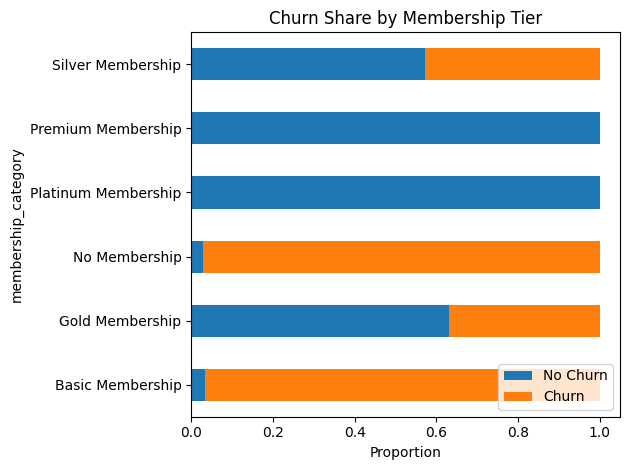

In [32]:
ct = pd.crosstab(df["membership_category"], df["churn_risk_score"], normalize="index")
ct = ct.rename(columns={0.0:"No Churn", 1.0:"Churn"}).loc[ct.index]  

ax = ct.plot(kind="barh", stacked=True)
ax.set_title("Churn Share by Membership Tier")
ax.set_xlabel("Proportion")
ax.legend(loc="lower right")
plt.tight_layout(); plt.show()

### Churn by Membership — Conclusion
- **Highest churn:** No Membership, Basic → weak perceived value; target upgrades/onboarding.
- **Mid churn:** Silver, Gold → better but still meaningful; reinforce value.
- **Lowest churn:** Platinum, Premium → near-zero churn; maintain benefits.
- **Action:** Prioritize retention offers for entry tiers; protect premium experience.

### Q2. Do churn rates differ by gender, and how is each churn group composed by gender?

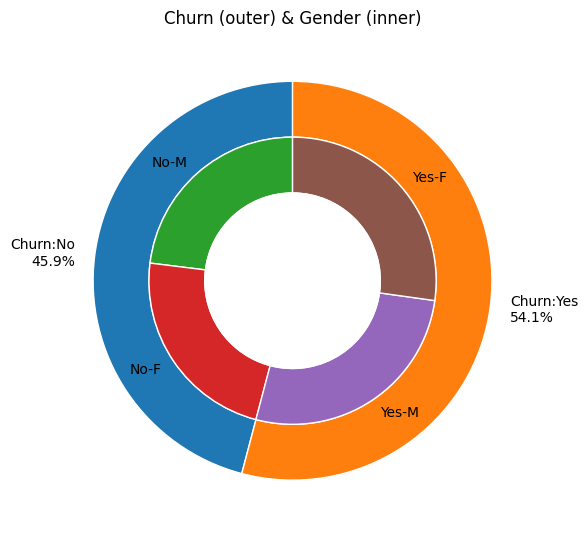

In [33]:
# Simple nested donut: outer = churn share, inner = gender split within each churn group
# Prep labels
df["ChurnLabel"] = df["churn_risk_score"].map({0:"No", 1:"Yes"})
df["Gender2"] = df["gender"].fillna("Unknown").map({"M":"M","F":"F"}).fillna("Unknown")

# Data
outer = df["ChurnLabel"].value_counts().reindex(["No","Yes"])
inner_tbl = pd.crosstab(df["ChurnLabel"], df["Gender2"]).reindex(index=["No","Yes"], columns=["M","F"]).fillna(0)
inner = inner_tbl.to_numpy().ravel()  # [No-M, No-F, Yes-M, Yes-F]

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(outer, labels=[f"Churn:{k}\n{v/outer.sum():.1%}" for k,v in outer.items()],
       radius=1.0, wedgeprops=dict(width=0.28, edgecolor="white"), startangle=90)
ax.pie(inner, labels=["No-M","No-F","Yes-M","Yes-F"],
       radius=0.72, wedgeprops=dict(width=0.28, edgecolor="white"), startangle=90)
ax.add_artist(plt.Circle((0,0), 0.44, color="white"))
ax.set_title("Churn (outer) & Gender (inner)")
plt.tight_layout(); plt.show()

In [34]:
df = df.drop('Gender2', axis=1)

### Gender vs Churn — Conclusion  
- Both **male and female customers churn significantly**, with no major gender gap.  
- Gender alone does **not appear to be a strong differentiator of churn**.  

**Recommendation:**  
Focus churn analysis on **behavioral features** (usage frequency, spending, complaints) rather than gender. Gender can still be used for **marketing segmentation**, but not as a primary churn predictor.

### Q3. Do customers with higher average transaction value churn more frequently?

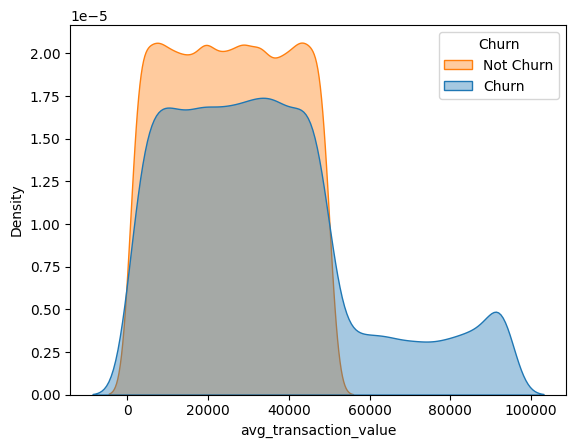

In [35]:
sns.kdeplot(
    data=df.assign(ChurnLabel=df["churn_risk_score"].map({0:"Not Churn", 1:"Churn"})),
    x="avg_transaction_value", hue="ChurnLabel", fill=True, common_norm=False, alpha=0.4
)
plt.legend(title="Churn", labels=["Not Churn", "Churn"])
plt.show()

### Avg Transaction Value vs Churn — Conclusion
- Customers with **lower avg transaction values (0–40K)** are more often **not churn** → low spenders are more stable.  
- Customers with **higher transaction values (60K–100K)** show higher **churn density** → big spenders are more at risk.  
- Suggests **price sensitivity**: heavy spenders may churn if they feel costs outweigh benefits.  

**Recommendation:**  
Target high-transaction-value customers with **loyalty rewards, premium service, or discounts** to reduce churn.  

### Q4. Do customers with higher wallet balances churn less?

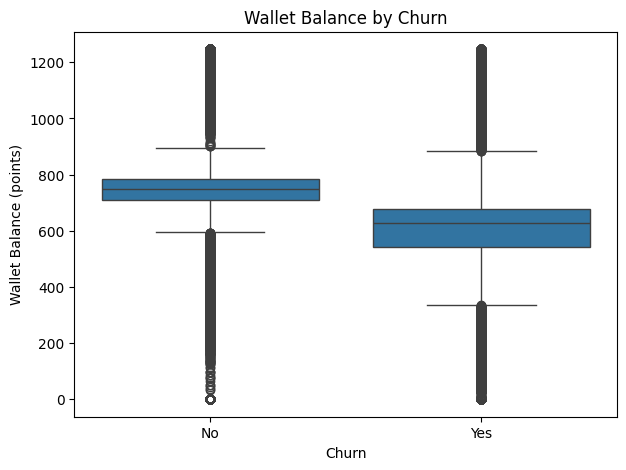

In [36]:
df["ChurnLabel"] = df["churn_risk_score"].map({0:"No", 1:"Yes"})
df["points_in_wallet"] = pd.to_numeric(df["points_in_wallet"], errors="coerce")

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="ChurnLabel", y="points_in_wallet")
plt.xlabel("Churn"); plt.ylabel("Wallet Balance (points)")
plt.title("Wallet Balance by Churn")
plt.show()

### Box Plot Interpretation: Wallet Balance by Churn  

**Median Balance**  
- Non-churned customers (No) have a higher median wallet balance (~750).  
- Churned customers (Yes) have a lower median (~620).  
=> Suggests customers with more wallet balance are less likely to churn.  

**Spread (IQR – interquartile range)**  
- Non-churn group has a tighter spread (most balances between ~600–800).  
- Churn group shows a wider spread, meaning more variation in balances.  

**Outliers**  
- Both groups have extreme values (very low and very high balances).  
- Churned customers show more low-balance cases.  

**Overall Trend**  
- Higher wallet balances are linked to lower churn.  
- Customers with low wallet balances appear more at risk of churn.  

### Q5. Is there a churn difference between customers with zero vs. non-zero wallet points?

Churn rate (%):
 points_in_wallet
Non-zero    54.02
Zero        54.85
Name: churn_risk_score, dtype: float64


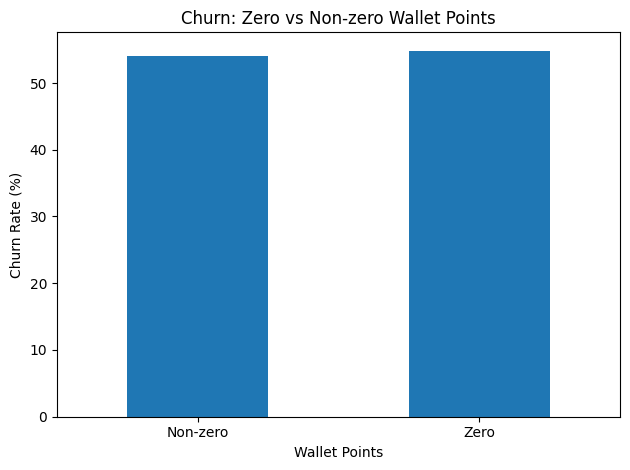

In [37]:
# make numeric (safeguard) and build flag
pts = pd.to_numeric(df["points_in_wallet"], errors="coerce").fillna(0)
flag = (pts <= 0).map({True: "Zero", False: "Non-zero"})

rate = df.groupby(flag)["churn_risk_score"].mean().mul(100).round(2)
print("Churn rate (%):\n", rate)

ax = rate.plot(kind="bar", title="Churn: Zero vs Non-zero Wallet Points")
ax.set_ylabel("Churn Rate (%)"); ax.set_xlabel("Wallet Points")
plt.xticks(rotation=0); plt.tight_layout(); plt.show()

### Zero vs Non-zero Wallet Points — Conclusion
- Churn is ~54–55% for both groups (difference < 1%).
- Simply having wallet points does **not** meaningfully reduce churn.
- Focus retention on other drivers (usage, tier, offers).

### Q6.  Does higher login frequency correlate with lower churn risk?

In [38]:
# Build the feature as a Series (no mutation of df)
days = pd.to_numeric(df["avg_frequency_login_days"], errors="coerce")
login_freq_per_week = (7 / days.replace(0, np.nan)).clip(lower=0)

In [39]:
df_freq = pd.DataFrame({
    "login_freq_per_week": login_freq_per_week,
    "churn_risk_score": df["churn_risk_score"].astype(int)
}, index=df.index)

In [40]:
# Monotonic relationship (Spearman)
corr = df_freq[["login_freq_per_week", "churn_risk_score"]].corr(method="spearman").iloc[0, 1]
print(f"Spearman corr = {corr:.3f}  (negative ⇒ higher frequency, lower churn)")

Spearman corr = -0.151  (negative ⇒ higher frequency, lower churn)


In [41]:
# Quintile ranges (≈20% each)
freq = df_freq["login_freq_per_week"].dropna()
bins_intervals = pd.qcut(freq, 5, duplicates="drop")            # intervals (for edges)
intervals = bins_intervals.cat.categories
counts    = bins_intervals.value_counts(sort=False)

print("\nLogin frequency quintile ranges (logins/week):")
labels = ["Q1(low)", "Q2", "Q3", "Q4", "Q5(high)"]
for lbl, iv, n in zip(labels, intervals, counts):
    print(f"- {lbl}: {iv.left:.3f} → {iv.right:.3f}  (n={n}, {n/len(freq):.1%} of users)")


Login frequency quintile ranges (logins/week):
- Q1(low): 0.169 → 0.292  (n=7347, 22.4% of users)
- Q2: 0.292 → 0.389  (n=6995, 21.3% of users)
- Q3: 0.389 → 0.500  (n=5355, 16.3% of users)
- Q4: 0.500 → 0.778  (n=6623, 20.2% of users)
- Q5(high): 0.778 → 760.200  (n=6467, 19.7% of users)



Churn rate by login-frequency bucket (%):
 freq_bin
Q1(low)     63.5
Q2          59.1
Q3          51.4
Q4          51.3
Q5(high)    43.1
Name: churn_risk_score, dtype: float64


/var/folders/6x/h489kd6s4lxbdnxrhw8mvt140000gn/T/ipykernel_42193/1313401476.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = tmp.groupby("freq_bin")["churn_risk_score"].mean().mul(100).round(1)


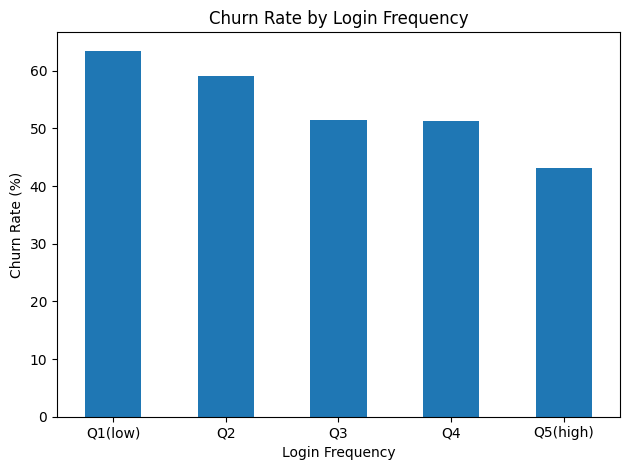

In [42]:
# Churn rate by quintile
bins = pd.qcut(freq, 5, labels=labels, duplicates="drop")
tmp  = df_freq.loc[freq.index].assign(freq_bin=bins)
rate = tmp.groupby("freq_bin")["churn_risk_score"].mean().mul(100).round(1)

print("\nChurn rate by login-frequency bucket (%):\n", rate)

ax = rate.plot(kind="bar", title="Churn Rate by Login Frequency")
ax.set_ylabel("Churn Rate (%)"); ax.set_xlabel("Login Frequency")
plt.xticks(rotation=0); plt.tight_layout(); plt.show()

### Login Frequency vs Churn — Conclusion

- **Correlation**:  
  The Spearman correlation is **-0.151**, showing a **negative relationship** between login frequency and churn risk.  
  → Customers who log in more frequently are slightly less likely to churn.  

- **Churn by Frequency Buckets**:  
  - **Q1 (lowest frequency)** → Churn rate ~63.5% (highest risk).  
  - **Q5 (highest frequency)** → Churn rate ~43.1% (lowest risk).  
  - Churn rate steadily declines from **low-frequency to high-frequency users**.  

- **Overall Insight**:  
  Customers who log in more often tend to stay engaged and are **less likely to churn**, while infrequent logins are a strong indicator of churn risk.  

Encouraging **more frequent customer logins** (e.g., engagement campaigns, gamification, or reminders) could help reduce churn.

### Q7. Which preferred offer type is best for customer satisfaction?

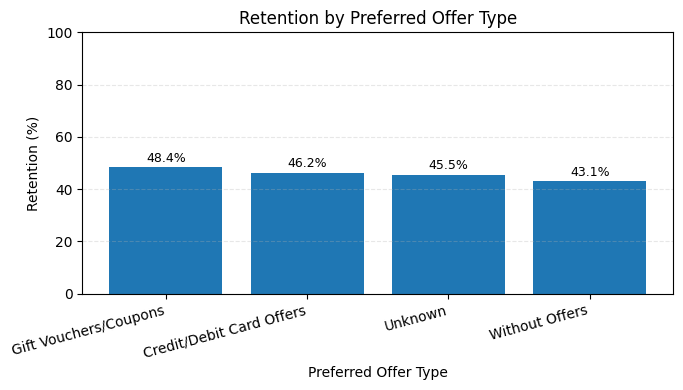

In [43]:
# Simple, cleaner chart with labels
ret = (1 - df.groupby("preferred_offer_types")["churn_risk_score"].mean())*100
ret = ret.round(2).sort_values(ascending=False)

plt.figure(figsize=(7,4))
bars = plt.bar(ret.index, ret.values)
plt.title("Retention by Preferred Offer Type")
plt.ylabel("Retention (%)"); 
plt.xlabel("Preferred Offer Type")
plt.ylim(0, 100); 
plt.grid(axis="y", ls="--", alpha=0.3)

# add value labels
for b in bars:
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+1, f"{b.get_height():.1f}%",
             ha="center", va="bottom", fontsize=9)

plt.xticks(rotation=15, ha="right")
plt.tight_layout(); 
plt.show()

### Preferred Offer Type vs Churn - Conclusion
- The gap is **modest (~5 pp)** from best (Vouchers) to lowest (No offers).
- This may be **statistically small** and **operationally marginal**.

### Q8. Do customers with past complaints churn more?

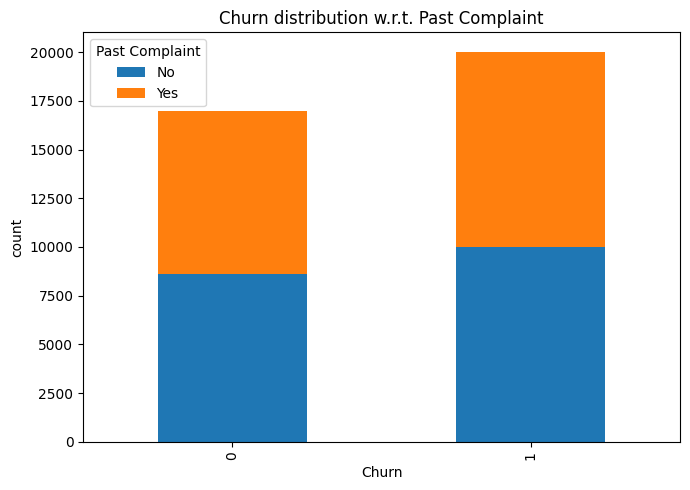

In [44]:
ct_counts = pd.crosstab(df["churn_risk_score"], df["past_complaint"])  # counts per churn group
ax = ct_counts.plot(kind="bar", stacked=True, figsize=(7,5))

ax.set_title("Churn distribution w.r.t. Past Complaint")
ax.set_xlabel("Churn")
ax.set_ylabel("count")
ax.legend(title="Past Complaint")
plt.tight_layout()
plt.show()

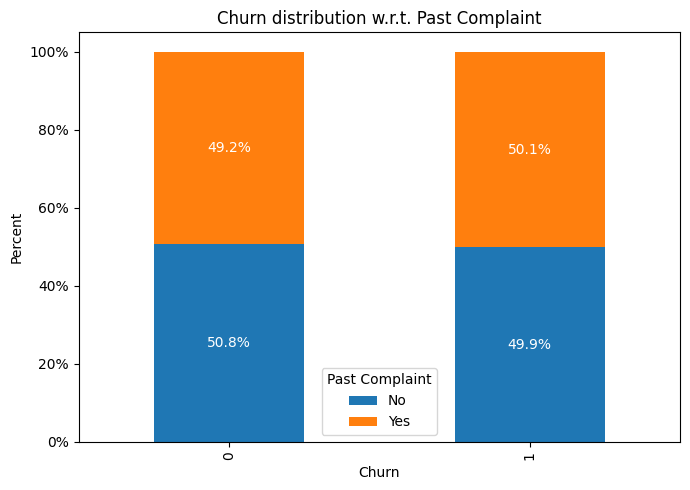

In [45]:
# proportions per churn group
ct = pd.crosstab(df["churn_risk_score"], df["past_complaint"], normalize="index")  # rows sum to 1.0

ax = ct.plot(kind="bar", stacked=True, figsize=(7,5))
ax.set_title("Churn distribution w.r.t. Past Complaint")
ax.set_xlabel("Churn")
ax.set_ylabel("Percent")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 0–1 → %

# add % labels on each stacked segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        x = p.get_x() + width/2
        y = p.get_y() + height/2
        ax.text(x, y, f"{height*100:.1f}%", ha="center", va="center", fontsize=10, color="white")

ax.legend(title="Past Complaint")
plt.tight_layout()
plt.show()

### Past Complaints → Churn (Conclusion)
- Churn shares are ~50/50 for both groups → **past complaints alone don’t drive churn**.
- Likely explanation: **post-complaint support is effective**, neutralizing risk.

**Recommendation:** Maintain/scale the current service-recovery playbook (fast SLA, follow-ups). Use complaints as a **trigger** to offer loyalty perks or onboarding tips, but prioritize other risk signals (low usage, entry tiers, non-referral) for retention targeting.

### Q9. (Optional) Which features (customer behaviors) have most impacts churn vs not-churn? (RandomForest + SHAP value)

In [46]:
# y
y = df["churn_risk_score"].astype(int)

In [47]:
# Split features into numeric vs categorical
cat_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
            'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference',
            'past_complaint', 'complaint_status', 'feedback']
num_cols = ['age', 'avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value', 
             'days_since_last_login', 'joining_date', 'points_in_wallet']
datetime_cols = ["joining_date"]

In [48]:
X_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

In [49]:
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)

In [50]:
# Set the time when I experience this code is now, you can consider it as a milestone in a real project
now = pd.to_datetime("20-09-2025", format="%d-%m-%Y")

In [51]:
X_dt = pd.DataFrame({
    f"{c}_age_days": (
        (now - pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True))
        .dt.total_seconds() / 86400
    ).clip(lower=0)
    for c in datetime_cols
})

/var/folders/6x/h489kd6s4lxbdnxrhw8mvt140000gn/T/ipykernel_42193/2812573019.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  (now - pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True))


In [52]:
X = pd.concat([X_num, X_cat, X_dt], axis=1).fillna(0)

In [53]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [66]:
# --- make sure Xtr, Xte are numeric ---
Xtr_num = (Xtr.apply(pd.to_numeric, errors="coerce")
             .fillna(0)
             .astype("float64"))

Xte_num = (Xte.reindex(columns=Xtr_num.columns)   # keep same column order
             .apply(pd.to_numeric, errors="coerce")
             .fillna(0)
             .astype("float64"))

assert list(Xtr_num.columns) == list(Xte_num.columns)

In [67]:
# Train RandomForest
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(Xtr_num, ytr)

RandomForestClassifier(n_estimators=200, random_state=42)

In [68]:
explainer = shap.Explainer(
    clf, Xtr_num,
    model_output="probability",          # we're explaining proba
    feature_names=Xtr_num.columns
)

# returns an Explanation
sh = explainer(Xte_num, check_additivity=False)

100%|===================| 14784/14798 [13:05<00:00]        

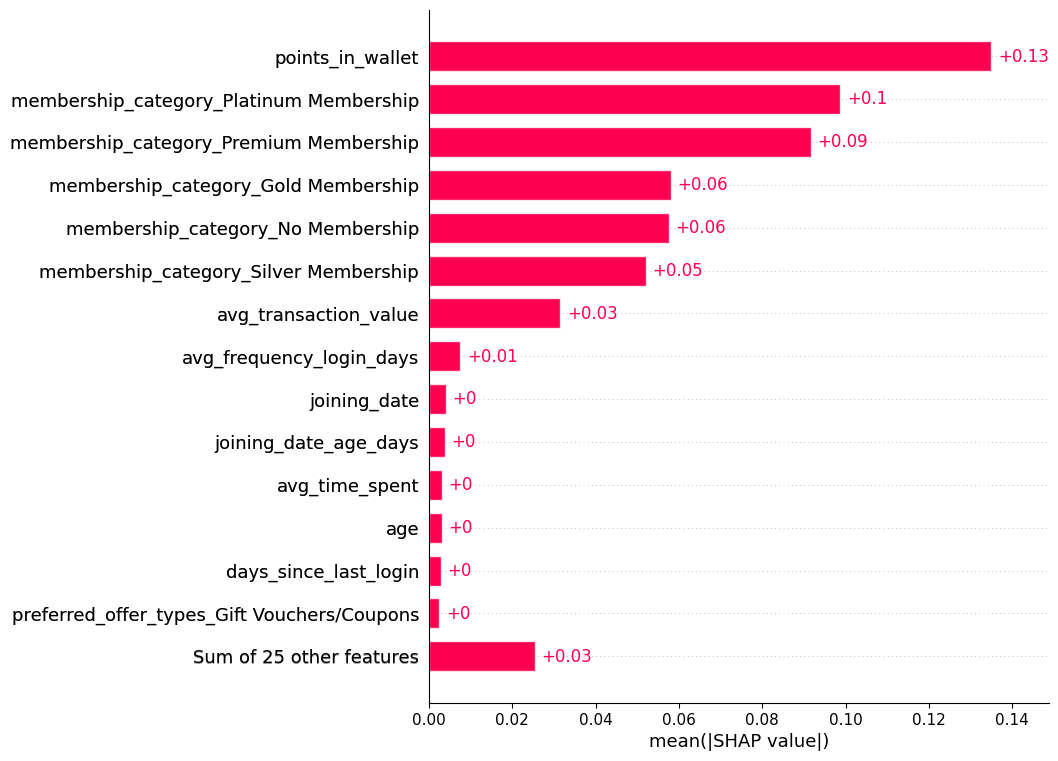

In [69]:
# slice class - 1 (churn)
sh_churn = sh[..., 1]

# bar plot of top 15 features
shap.plots.bar(sh_churn, max_display=15)

### Key Features Driving Churn (SHAP)

- **Wallet balance** → stronge factor; higher balance = lower churn.  
- **Membership tier** → Platinum/Premium/Gold reduce churn; No/Silver increase it.  
- **Spending** (`avg_transaction_value`) → moderate impact; higher spenders churn less.  
- **Engagement** (login frequency) → small but consistent; frequent users churn less.  
- **Tenure & demographics** → minimal effect.  

**Recommendation**: Focus retention on **wallet incentives** and **membership upgrades**, with re-engagement for low-activity users.  


### Q10. (Optional) How many separate customer groups based on their behaviors? (Kmean Clustering)

In [59]:
# Scale (clustering works better in standardized space)
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

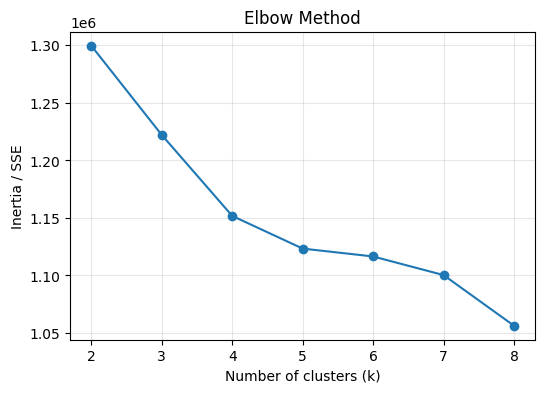

In [60]:
K = range(2, 9)                
inertias = []
models = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_std)
    inertias.append(km.inertia_)  # sum of squared distances (SSE)
    models.append(km)

plt.figure(figsize=(6,4))
plt.plot(list(K), inertias, "-o")
plt.xticks(list(K))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / SSE")
plt.title("Elbow Method")
plt.grid(True, alpha=0.3)
plt.show()

### Elbow Method Conclusion  
The curve bends around **k=4–5**, meaning the optimal number of clusters is likely **4** (simple) or **5** (more detail).  

[4 3 2 ... 0 4 1]


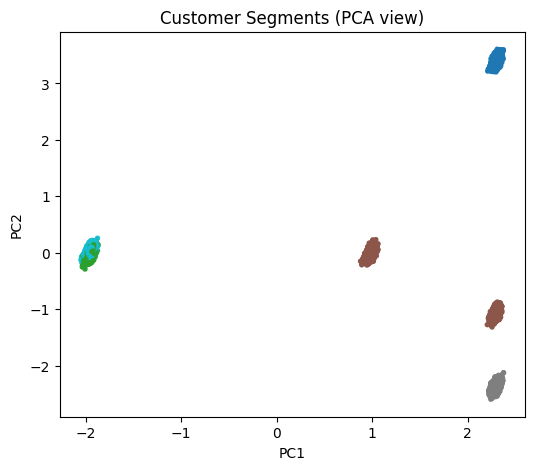

In [61]:
best_k = 4
cluster_labels = models[best_k-1].labels_            # integers 0..k-1
print(cluster_labels)
xy = PCA(n_components=2, random_state=42).fit_transform(X_std)

plt.figure(figsize=(6,5))
plt.scatter(xy[:,0], xy[:,1], c=cluster_labels, s=8, cmap="tab10")
plt.title("Customer Segments (PCA view)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

[4 3 1 ... 5 4 2]


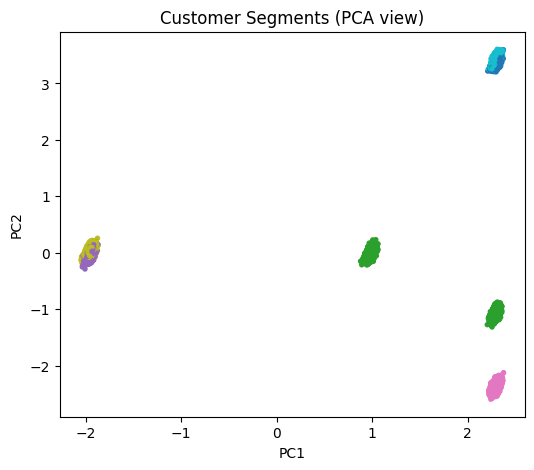

In [62]:
best_k = 5
cluster_labels = models[best_k-1].labels_            # integers 0..k-1
print(cluster_labels)
xy = PCA(n_components=2, random_state=42).fit_transform(X_std)

plt.figure(figsize=(6,5))
plt.scatter(xy[:,0], xy[:,1], c=cluster_labels, s=8, cmap="tab10")
plt.title("Customer Segments (PCA view)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

### Conclusion: Best K for Customer Segmentation
From the Elbow method, both **k=4** and **k=5** looked plausible.  
However, the PCA scatter plots show that with **k=4**, clusters are overlapping and not well separated.  
With **k=5**, the clusters are **clearer and more distinct**, suggesting that the optimal number of customer groups is **5**.  

In [63]:
best_k = 5
best_model = models[best_k-1]

In [64]:
# === Most distinctive behaviors per cluster (top features) ===
C = best_model.cluster_centers_

# z-scores across clusters (per feature/column)
Z = (C - C.mean(axis=0)) / (C.std(axis=0) + 1e-9)

# feature names used to fit KMeans 
feat_names = X.columns.to_list()    

top_n  = 5
for c in range(best_k):
    # indices of the largest absolute z-scores for cluster c
    idx = np.argsort(-np.abs(Z[c]))[:top_n]
    print(f"\nCluster {c}: top behaviors (z-score sign shows direction)")
    for i in idx:
        direction = "higher" if Z[c, i] > 0 else "lower"
        print(f"  - {feat_names[i]}: much {direction} than the average of all clusters ({abs(Z[c, i]):.2f} SD) ")


Cluster 0: top behaviors (z-score sign shows direction)
  - internet_option_Mobile_Data: much higher than the average of all clusters (2.02 SD) 
  - avg_frequency_login_days: much higher than the average of all clusters (2.02 SD) 
  - preferred_offer_types_Without Offers: much lower than the average of all clusters (1.98 SD) 
  - avg_time_spent: much lower than the average of all clusters (1.91 SD) 
  - region_category_Village: much higher than the average of all clusters (1.87 SD) 

Cluster 1: top behaviors (z-score sign shows direction)
  - complaint_status_Solved in Follow-up: much higher than the average of all clusters (2.24 SD) 
  - feedback_Solved in Follow-up: much higher than the average of all clusters (2.24 SD) 
  - joined_through_referral_Unknown: much higher than the average of all clusters (2.16 SD) 
  - gender_M: much lower than the average of all clusters (1.09 SD) 
  - preferred_offer_types_Gift Vouchers/Coupons: much lower than the average of all clusters (1.07 SD) 


### K-Means Segmentation — Conclusion

**How many groups?**  
Using the elbow method and PCA separation, the data are best segmented into **5 distinct customer groups**.

**High-level profiles (top behaviors per cluster)**

- **Cluster 0 – Mobile & frequent users (Village-leaning)**
  - Much **higher** mobile-data internet usage and **higher login frequency**.
  - **Lower time spent** per session; **more Village** region.
  - Dislike “**Without Offers**” (prefer to have some kind of offer available).

- **Cluster 1 – Issues solved via follow-up (female-leaning)**
  - Complaints and feedback **solved in follow-up** far **higher** than average.
  - **Referral source unknown** is higher; **male share lower**.
  - **Lower** interest in **Gift Vouchers/Coupons**.

- **Cluster 2 – Older, established members with few complaints**
  - **Older age**; **fewer “No Membership”** (i.e., more are members).
  - Complaint/feedback often **“Not Applicable”**; **past complaints lower**.

- **Cluster 3 – Quick resolutions & offer-active**
  - **Solved** complaints/feedback **much higher**.
  - **Less** “joined by referral”; **fewer Platinum** members.
  - **Higher** willingness to **apply for offers**.

- **Cluster 4 – Younger, offer-applicants but discount-light**
  - **Younger age**.
  - **Less** use of **special discounts**, yet **more** likely to **apply for offers**.
  - Complaint/feedback often **“Not Applicable”**.

**Takeaway:**  
Five segments provide clear, behaviorally distinct groups useful for targeted offers, complaint-handling strategies, and channel personalization.

# 8) Conclusion

# Final Conclusion & Business Recommendations

## Summary of Findings
- **Membership tier is the strongest churn driver**: Low tiers (No/Silver/Basic) have high churn; Premium/Platinum show strong loyalty.  
- **Financial behavior matters**: Higher wallet balances reduce churn; high-spending customers are more churn-sensitive.  
- **Engagement reduces churn**: Frequent logins lower churn risk; infrequent logins are a warning signal.  
- **Complaints are not churn drivers** if resolved quickly—service recovery is effective.  
- **Demographics (gender, offers)** play a minor role, but offer type still influences behavior.  
- **Best segmentation = 5 clusters** with distinct profiles (mobile-heavy users, follow-up resolution seekers, older loyal members, quick-resolution/offer users, younger discount-light users).

## Business Decision-Making
1. **Retention & Loyalty Programs**
   - Push **wallet incentives and tier upgrades** for No/Silver/Basic members.
   - Protect high-value Premium/Platinum members with **exclusive perks**.

2. **Customer Engagement**
   - Increase logins via **gamification, reminders, app campaigns**.
   - For low-frequency users, design **reactivation offers**.

3. **Complaint Management**
   - Keep **fast SLA and follow-up processes**, as they neutralize churn risk.
   - Use complaints as a **trigger for loyalty outreach**.

4. **Pricing & Offers**
   - Manage high-spender churn with **targeted discounts, premium services, or loyalty rewards**.
   - Segment offers: vouchers for price-sensitive clusters, personalized deals for offer-active clusters.

5. **Segment-Specific Strategies**
   - **Cluster 0 (Mobile & frequent users)** → Push app-based offers and regional campaigns.  
   - **Cluster 1 (Follow-up resolution seekers)** → Emphasize **customer care quality**.  
   - **Cluster 2 (Older loyal members)** → Build **long-term value programs**.  
   - **Cluster 3 (Quick-resolution, offer-active)** → Upsell through **time-limited offers**.  
   - **Cluster 4 (Young, discount-light)** → Promote **innovative bundles instead of heavy discounts**.  

## Takeaway
Churn is best reduced by **upgrading entry-tier members, incentivizing wallet balance, and boosting engagement**.  
The **5 behavioral clusters** enable **personalized marketing and service strategies**, turning insights into **actionable business decisions**.
